# Day 3: Afternoon Lab
## Transcriptomics Data Analysis Using Python

---

# 📌Transcriptomics Data Analysis Using Python


🎯 Objective
*   Understand the process of Single Cell RNA-Seq
*   Learn the functionality of SciPy


⚡ Overview

*   Loading Data into SciPy
*   Different ways to control the quality of your data
*   Normalization and why it is important
*   Looking into dimensionality reduction techniques like PCA, and UMAP
*   Clustering data and visualizing the clusters



---






##What is `ScanPy`
Scanpy is an open-source Python package designed for the analysis of single-cell RNA-seq data. It provides tools for data preprocessing, visualization, dimensionality reduction, clustering, and differential expression analysis, among other functions. Scanpy is built on top of popular Python libraries like NumPy, SciPy, and Matplotlib, and is widely used in the bioinformatics community for large-scale single-cell transcriptomics analysis.

---

for more information into the Scanpy library you can follow this toturial:

 https://datascienceforbio.com/scanpy-tutorial/

OR alternatively this one if the link above does not work

https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html



---





Before Beginning the Analysis you have to install Scanpy into your notebook

In [ ]:
!pip install scanpy

### The normal process of importing data usually follows these steps:


*   Import the cell barcodes (Cell barcoding is a technique used to distinguish between unique cells) cell barcodes in Single Cell RNA-Seq usually represent the cell IDs
*   Import Gene names (Gene names are usually saved in tsv/csv format)
*   Import the counts matrix. This matrix holds the expression value of the data

The following is an example of importing local data:
```python
cellbarcodes = pd.read_csv("example_directory/barcodes.tsv", header=None, sep='\t')
genenames = pd.read_csv("example_directory/genes.tsv", header=None, sep='\t')
counts = mmread("example_directory/matrix.mtx").tocsc()
print(counts.shape)
```
The following is the structure of an AnnData object which scanpy is built on top of.

*   vars usually host gene data and is a pandas dataframe
*   obs usually host the cell data and is also a pandas dataframe
*   X is the counts matrix hosting the expression values and is a numpy array



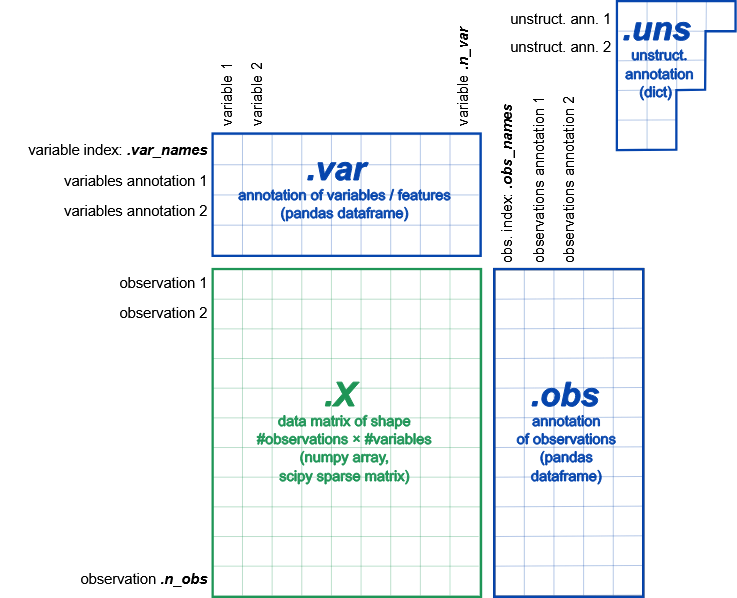




obsob

In the Next excercises you will be loading an online dataset so the process will differ. But knowing what your data is comprised of is key in understanding the process of your analysis


In [ ]:
#Packages required
import os
from scipy.io import mmread
import pandas as pd
from argparse import ArgumentParser
from pathlib import Path
import scanpy as sc
from matplotlib.pyplot import rc_context

### **📌 Step1: Load the Dataset**

`pbmc3k`: This is a pre-loaded dataset in scanpy containing single-cell RNA-seq data from 3,000 peripheral blood mononuclear cells (PBMCs). It is often used as a reference dataset for tutorials and examples in single-cell RNA-seq analysis.

Abstractly, gene expression data can be viewed as a matrix of rows and columns, rows representing the genes and columns representing the specific conditions of the array measurement.


In [ ]:
#Load data from the package

# Figure settings
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()

# Load data
adata = sc.datasets.pbmc3k()


#### **🔶 Task 1/3:**
Describe the dataset dimensions: How many cells and genes are present in the dataset?




In [ ]:
#Describe dataset dimensions (Hint: cell data is referred to as obs and gene data is vars inside of scanpy)
#your code here


###

<details>

<summary><font color="blue">Click here to reveal the answer</font></summary>

```python

print(f"The dataset contains {adata.n_obs} cells and {adata.n_vars} genes.")
```
</details>

#### **🔶 Task 2/3:**
Explore metadata: What kind of metadata is available in the adata.obs table? Use adata.obs.head() and adata.var.head() to inspect.

Note: The pbmc3k dataset provided by scanpy does not come with preloaded cell-level annotations like cluster identities or cell types. It's often used as a minimal example dataset for downstream analysis.

In [ ]:
# View the metadata for cells (e.g., cell annotations)
print ("Metadata for cells:")
print()  #print The first few rows of cell metadata
print("-------------------------------------------------------------------------")

# View the metadata for genes (e.g., gene names)
print ("Metadata for genes:")
print()  #print first few rows of gene metadata

<details>

<summary><font color="blue">Click here to reveal the answer</font></summary>

```python
# View the metadata for cells (e.g., cell annotations)
print ("Metadata for cells:")
print(adata.obs.head())  # The first few rows of cell metadata
print("-------------------------------------------------------------------------")

# View the metadata for genes (e.g., gene names)
print ("Metadata for genes:")
print(adata.var.head())  # The first few rows of gene metadata

```
</details>

#### **🔶 Task 3/3:**
View the content of the matrix:

In [ ]:
#continue your code here
dense_matrix = #Convert the density matrix to an array
print(dense_matrix)

<details>

<summary><font color="blue">Click here to reveal the answer</font></summary>

```python
dense_matrix = adata.X.toarray()
print(dense_matrix)
```
</details>

### **📌Step 2: Quality Control and Preprocessing:**

Quality Control and Preprocessing:

The raw data from scRNA-seq experiments may contain noise and artifacts. Quality control steps include evaluating data quality, filtering out low-quality cells, and normalizing the data to correct for technical variations. Additionally, the proportions of counts for specific gene populations, such as mitochondrial, ribosomal, and hemoglobin genes, are calculated based on defined prefixes as listed below.


#### **🔶 Task 1/3:**
Calculate QC metrics and identify mitochondrial, ribosomal, and hemoglobin genes

Question: Why removal of the mitochondrial, ribosomal, and hemoglobingenes is a common preprocessing step in scRNA seq analysis?

Because they are considered as highly abundant and non-informative genes.
Such genes are filtered out to enhance the accuracy and sensitivity of downstream analyses, such as clustering, dimensionality reduction, and differential expression analysis, in scRNA-seq data. Removing these genes helps focus on biologically relevant signals, improving the quality of the results.

"Calculate QC metrics" in RNA-seq refers to computing statistical measures to assess the data quality. This includes evaluating read quality, mapping statistics (like alignment rate), duplication rates, and transcript integrity to ensure the data is reliable for downstream analysis.

In [ ]:
# Calculate quality control (QC) metrics
adata_wQC = adata.copy()
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)


In [ ]:
# Find mitocondrial genes, # mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata_wQC.var_names.str.startswith('MT-')
adata_wQC.var['mt'] = adata_wQC.var_names.str.startswith('MT-')
adata_wQC.var['mt']
for gene_name in adata_wQC.var_names[adata_wQC.var['mt']]:
    print(gene_name)



In [ ]:
# ribosomal genes
adata_wQC.var["ribo"] = adata_wQC.var_names.str.startswith(("RPS", "RPL"))
for gene_name in adata_wQC.var_names[adata_wQC.var['ribo']]:
    print(gene_name)

# hemoglobin genes
adata_wQC.var["hb"] = adata_wQC.var_names.str.contains("^HB[^(P)]")
for gene_name in adata_wQC.var_names[adata_wQC.var['hb']]:
    print(gene_name)


#### **🔶 Task 2/3:**
Visualize the effects that the previously identified genes have on the dataset

---


A violin plot in RNA-seq analysis combines a box plot and a density plot to show gene expression distribution across different conditions. It displays:

Gene expression variability: Illustrates how gene expression varies within or between conditions.

Comparisons: Enables comparison of expression across conditions or genes.
Density and outliers: The plot’s width indicates data density, with outliers easily identifiable.

Violin plots are useful in RNA-seq to assess variability, compare conditions, and visualize expression distributions.


We can now inspect violin plots of some of the computed QC metrics:






The following code uses the Scanpy library to create a violin plot
for visualizing the distribution of three quality control metrics
across single cells in the adata_wQC AnnData object.


In [ ]:
# Calculates quality control (QC) metrics on mitochondrial genes
sc.pp.calculate_qc_metrics(adata_wQC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata_wQC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)



*   `n_genes_by_counts`: The number of genes detected (with non-zero counts) in each cell.

*   `total_counts`: The total number of RNA molecules (reads) detected in each cell.

* `pct_counts_mt`: The percentage of RNA reads that map to mitochondrial genes in each cell, often used to assess cell quality.






The following code shows the relationship between `total_counts` and `pct_counts_mt`. Additionally, the colors of the dots are encoded according to the `n_genes_by_counts` variable.

In [ ]:
#Additionally, it is useful to consider QC metrics jointly by inspecting a scatter plot colored by `pct_counts_mt`.
sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')

The following code shows the relationship between `total_counts` and    `n_genes_by_counts`. Additionally, the colors of the dots are coded according to the variable `pct_counts_mt`.

In [ ]:
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

#### **🔶 Task 3/3**


Based on the QC metric plots, one could now remove cells that have too many mitochondrial genes expressed or too many total counts by setting manual or automatic thresholds. However, sometimes what appears to be poor QC metrics can be driven by real biology so we suggest starting with a very permissive filtering strategy and revisiting it at a later point. We therefore now only filter cells with less than 200 genes expressed and genes that are detected in less than 3 cells.

Additionally, it is important to note that for datasets with multiple batches, quality control should be performed for each sample individually as quality control thresholds can very substantially between batches.

In [ ]:
# Filtering cells and genes
# Filtering cells with < 200 genes and higher mt genes (>5%)
adata_wQC_filt = adata_wQC.copy()
sc.pp.filter_cells(adata_wQC_filt, min_genes=200)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.pct_counts_mt < 5, :]

# This code filters out cells containing fewer than 2500 genes.
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.n_genes_by_counts < 2500, :]

# This code filters genes that are not expressed in at least 3 cells as outlier observations and deletes them from the data set.
sc.pp.filter_genes(adata_wQC_filt, min_cells=3)

# Visualizing the filtered dataset.
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

### **📌Step 3: Normalization:**
Normalization: Normalization is crucial to account for differences in sequencing depth and other technical biases among cells. Normalization methods aim to ensure that the gene expression values are comparable across cells.

The next preprocessing step is normalization. A common approach is count depth scaling with subsequent log plus one (log1p) transformation. Count depth scaling normalizes the data to a “size factor” such as the median count depth in the dataset, ten thousand (CP10k) or one million (CPM, counts per million). The size factor for count depth scaling can be controlled via target_sum in pp.normalize_total. We are applying median count depth normalization with log1p transformation (AKA log1PF).

#### **🔶 Task 1/4:**
Summarize statistics of the raw data before normalization: use max(), min() mean(), std() from the numpy library

In [ ]:
import numpy as np

# Before normalization - summary statistics of the raw data
print("Summary statistics before normalization:")

# Convert sparse matrix to dense format for summary statistics
adata_dense = adata.X.todense()# use the .todense() on the data matrix

# Calculate summary statistics
print("Min value:", np.min(adata_dense))
print("Max value:", np.max(adata_dense))
print("Mean value:", np.mean(adata_dense))
print("Standard deviation:", np.std(adata_dense))


<details>

<summary><font color="blue">Click here to reveal the answer</font></summary>

```python

import numpy as np

# Before normalization - summary statistics of the raw data
print("Summary statistics before normalization:")
# Convert sparse matrix to dense format for summary statistics
adata_dense = adata.X.todense()

# Calculate summary statistics
print("Min value:", np.min(adata_dense))
print("Max value:", np.max(adata_dense))
print("Mean value:", np.mean(adata_dense))
print("Standard deviation:", np.std(adata_dense))
```
</summary>


#### **🔶 Task 2/4**
Normalize and apply log transformation to the data

In [ ]:
# Normalization and Log transformation
norm_data = adata_wQC_filt.copy()

#use the'.pp.normalize_total' function from scipy on the newly made copy of the data
sc.pp.normalize_total(norm_data, target_sum=1e4)
##

# log n+1 transformation
sc.pp.log1p(norm_data)

<details>

<summary><font color="blue">Click here to reveal the answer</font></summary>

```python

# Normalization and Log transformation
norm_data = adata_wQC_filt.copy()
sc.pp.normalize_total(norm_data, target_sum=1e4)

# log n+1 transformation
sc.pp.log1p(norm_data)
```
</details>

#### **🔶 Task 3/4**
Now, lets identify highly variable genes (HVGs) in this single-cell RNA sequencing (scRNA-seq) dataset and visualize them.

In [ ]:
#Identify highy variable genes
HVG_data = norm_data.copy()
#Continue your code here

# Visualizing the HVGs
#Continue your code here
HVG_data = norm_data.copy()
sc.pp.highly_variable_genes(HVG_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
HVG_data.var['highly_variable']

# Visualizing the HVGs
sc.pl.highly_variable_genes(HVG_data)

<details>

<summary><font color="blue">Click here to reveal the answer</font></summary>

```python

HVG_data = norm_data.copy()
sc.pp.highly_variable_genes(HVG_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
HVG_data.var['highly_variable']

# Visualizing the HVGs
sc.pl.highly_variable_genes(HVG_data)
```
</details>

#### **🔶 Task 4/4**
Summarize statistics of the raw data after normalization: use max(), min() mean(), std() from the numpy library

In [ ]:
# After normalization - summary statistics of the normalized data
print("\nSummary statistics after normalization:")
# Convert sparse matrix to dense format for summary statistics
adata_dense = norm_data.X.todense()

# Calculate summary statistics again
print("Min value:", np.min(adata_dense))
print("Max value:", np.max(adata_dense))
print("Mean value:", np.mean(adata_dense))
print("Standard deviation:", np.std(adata_dense))

### **📌Step 4: Feature Selection**

As a next step, we want to reduce the dimensionality of the dataset and only include the most informative genes. This step is commonly known as feature selection. The scanpy function pp.highly_variable_genes annotates highly variable genes by reproducing the implementations of Seurat {cite}Satija2015, Cell Ranger {cite}Zheng2017, and Seurat v3 {cite}Stuart2019 depending on the chosen flavor.

In [ ]:
#This code filters the gene expression matrix in the HVG data structure to include only genes with high variability.
HVG_data = HVG_data[:, HVG_data.var.highly_variable]

# Visualizing the HVGs
sc.pl.highly_variable_genes(HVG_data)

In [ ]:
# This code visualizes genes with high expression levels
sc.pl.highest_expr_genes(adata, n_top=20)

### **📌Step 5: Dimensionality Reduction**

Dimensionality Reduction: scRNA-seq data are often high-dimensional, with each cell represented by the expression levels of thousands of genes. Dimensionality reduction techniques, such as Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE), are used to visualize and explore the data in a lower-dimensional space while retaining its key features.

Summary of the processes below:

Data Scaling: Standardizing the data by centering and scaling to ensure each gene has equal importance in downstream analyses.

PCA: Reducing the dimensionality of the data by identifying principal components that explain the most variance.

Finding Neighbors: Computing a neighborhood graph using the first 15 principal components to understand the relationships between cells.

UMAP: Using UMAP to further reduce the dimensionality, focusing on preserving the local structure, which helps in visualizing clusters of cells in a lower-dimensional space (e.g., 2D or 3D).


`sc.tl.pca()`: Performs Principal Component Analysis (PCA) on the scaled data to reduce the dimensionality while retaining the most significant features that explain the variance in the data.

`sc.pl.pca_variance_ratio()`: Plots the variance ratio explained by each principal component. The log=True parameter helps in better visualizing the variance by scaling it logarithmically. The n_pcs=50 parameter indicates that you are considering the first 50 principal components.

`sc.pl.pca_loadings()`: Visualizes the loadings of the genes for the selected principal components. This helps in understanding which genes contribute most to the principal components.


In [ ]:
# Scaling the data
#sc.pp.scale(): This step normalizes the data by centering each feature (gene) to have zero mean and scaling it to have a variance of 1. Additionally, the max_value=10 parameter ensures that any gene with values larger than 10 will be capped at 10, preventing extreme outliers.
pcHVG_data = HVG_data.copy()
sc.pp.scale(pcHVG_data, max_value=10)

# Dimensionality reduction with PCA
sc.tl.pca(pcHVG_data)
sc.pl.pca_variance_ratio(pcHVG_data, log=True, n_pcs=50)
sc.pl.pca_loadings(pcHVG_data)

# Finding Neighbors by computing the neighborhood graph
#Neighborhood Graph: It calculates the similarity between cells based on their PCA-reduced representations (or other features) and creates a graph where nodes represent cells, and edges connect similar cells (neighbors).
sc.pp.neighbors(pcHVG_data, n_pcs=15)

# Embedding the neighborhood graph by running UMAP
umHVG_data = pcHVG_data.copy()
sc.tl.umap(umHVG_data)




### **📌Step 6: Visualization of gene expression and other variables**
For the scatter plots, the value to plot is given as the color argument. This can be any gene or any column in .obs, where .obs is a DataFrame containing the annotations per observation/cell, see AnnData for more information.

In [ ]:
# Visualization
sc.pl.umap(umHVG_data,color=['CST3', 'NKG7', 'TNFRSF4'])

Multiple values can be given to color. In the following example we will plot different genes to get an idea on where those marker genes are being expressed.

The number of plots per row is controlled using the ncols parameter. The maximum value plotted can be adjusted using vmax (similarly vmin can be used for the minimum value). In this case we use p99, which means to use as max value the 99 percentile. The max value can be a number or a list of numbers if the vmax wants to be set for multiple plots individually.

Also, we are using frameon=False to remove the boxes around the plots and s=50 to set the dot size.



In [ ]:
# rc_context is used for the figure size, in this case 4x4
color_vars = [
    "CD79A",
    "MS4A1",
    "IGJ",
    "FCER1A",
    "FCGR3A"
]
with rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(umHVG_data, color=color_vars, s=50, frameon=False, ncols=4, vmax="p99")

### The End

References



Fishell, G., Huang, S., Rizzo, D., Wu, S., Xu, Q., Zaine, L., Alghamdi, N., Stafford, D., Daigle, T., Tasic, B., Zeng, H., & Ibrahim, L. (2024). Neurogliaform Cells Exhibit Laminar-Specific Responses in the Visual Cortex and Modulate Behavioral State-Dependent Cortical Activity. https://doi.org/10.21203/rs.3.rs-4530873/v1

Wikimedia Foundation. (n.d.). File:great-plate-count-anomaly.svg. Wikipedia. https://en.m.wikipedia.org/wiki/File:Great-plate-count-anomaly.svg

Aras, M. (2024, January 31). ScRNA-seq analysis with python. Medium. https://medium.com/@aras.merve.20/scrna-seq-analysis-with-python-1f245914df38

#### Contributed by: Suhaib Alghamdi

- [LinkedIn Profile](https://www.linkedin.com/in/suhaib-alghamdi/)